Accuracy: 0.9955
Precision: 0.4226
Recall: 0.4484
False Positive Rate: 0.0024
True Negative Rate: 0.9976
False Negative Rate: 0.5516
ROC AUC Score: 0.7230
Cost: 28020.0000
F-measure: 0.4351
Balanced Classification Rate: 1.4460
Mathews Correlation Coefficient: 0.4330
Geometric Mean: 0.6688
Weighted Accuracy: 0.7230


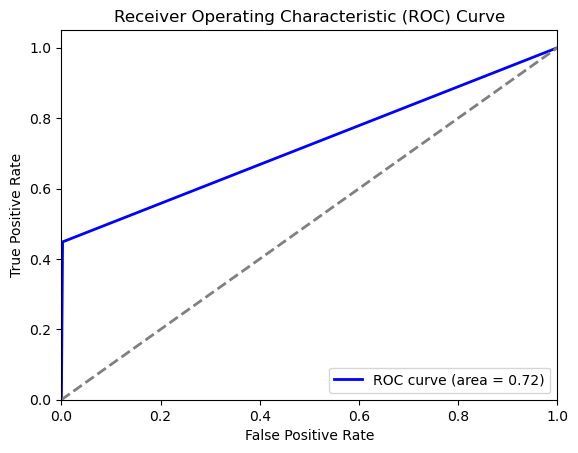

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'fraudTest.csv'
df = pd.read_csv(file_path)

# Data preprocessing
# Dropping certain columns and any other non-numeric columns
df = df.drop(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num', 'unix_time', 'merch_long'], axis=1)

# Encode categorical variables (gender)
df = pd.get_dummies(df, columns=['gender'])

# Split the data into features and target
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the DecisionTree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Calculate performance measures
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate additional measures
tn, fp, fn, tp = conf_matrix.ravel()
false_positive_rate = fp / (fp + tn)
true_negative_rate = tn / (tn + fp)
false_negative_rate = fn / (fn + tp)
cost = 100 * fn + 10 * (fp + tp)
f_measure = 2 * (precision * recall) / (precision + recall)
balanced_classification_rate = 1 * (tp / (tp + fn) + tn / (tn + fp))
mathews_corr_coef = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
geometric_mean = (true_negative_rate * recall) ** 0.5

# Define weight for weighted accuracy calculation
w = 0.5

# Calculate weighted accuracy
weighted_accuracy = w * recall + (1 - w) * true_negative_rate

# Print the performance measures
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Positive Rate: {false_positive_rate:.4f}")
print(f"True Negative Rate: {true_negative_rate:.4f}")
print(f"False Negative Rate: {false_negative_rate:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Cost: {cost:.4f}")
print(f"F-measure: {f_measure:.4f}")
print(f"Balanced Classification Rate: {balanced_classification_rate:.4f}")
print(f"Mathews Correlation Coefficient: {mathews_corr_coef:.4f}")
print(f"Geometric Mean: {geometric_mean:.4f}")
print(f"Weighted Accuracy: {weighted_accuracy:.4f}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.9978
Precision: 0.8704
Recall: 0.5047
False Positive Rate: 0.0003
True Negative Rate: 0.9997
False Negative Rate: 0.4953
ROC AUC Score: 0.7522
Cost: 23570.0000
F-measure: 0.6389
Balanced Classification Rate: 1.5044
Mathews Correlation Coefficient: 0.6619
Geometric Mean: 0.7103
Weighted Accuracy: 0.7522


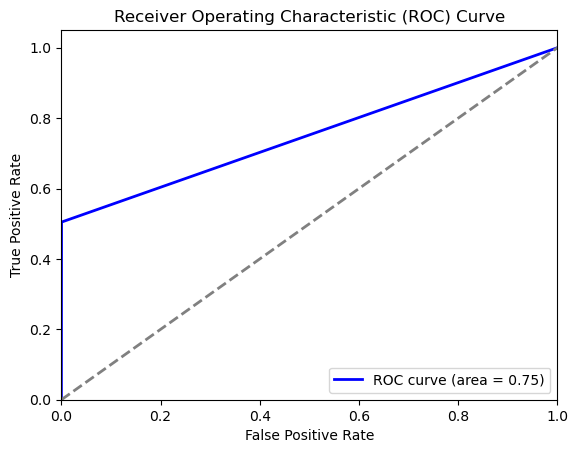

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'fraudTest.csv'
df = pd.read_csv(file_path)

# Data preprocessing
# Dropping certain columns and any other non-numeric columns
df = df.drop(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num', 'unix_time', 'merch_long'], axis=1)

# Encode categorical variables (gender)
df = pd.get_dummies(df, columns=['gender'])

# Split the data into features and target
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Calculate performance measures
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate additional measures
tn, fp, fn, tp = conf_matrix.ravel()
false_positive_rate = fp / (fp + tn)
true_negative_rate = tn / (tn + fp)
false_negative_rate = fn / (fn + tp)
cost = 100 * fn + 10 * (fp + tp)
f_measure = 2 * (precision * recall) / (precision + recall)
balanced_classification_rate = 1 * (tp / (tp + fn) + tn / (tn + fp))
mathews_corr_coef = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
geometric_mean = (true_negative_rate * recall) ** 0.5

# Define weight for weighted accuracy calculation
w = 0.5

# Calculate weighted accuracy
weighted_accuracy = w * recall + (1 - w) * true_negative_rate

# Print the performance measures
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Positive Rate: {false_positive_rate:.4f}")
print(f"True Negative Rate: {true_negative_rate:.4f}")
print(f"False Negative Rate: {false_negative_rate:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Cost: {cost:.4f}")
print(f"F-measure: {f_measure:.4f}")
print(f"Balanced Classification Rate: {balanced_classification_rate:.4f}")
print(f"Mathews Correlation Coefficient: {mathews_corr_coef:.4f}")
print(f"Geometric Mean: {geometric_mean:.4f}")
print(f"Weighted Accuracy: {weighted_accuracy:.4f}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.9970
Precision: 0.7461
Recall: 0.3380
False Positive Rate: 0.0004
True Negative Rate: 0.9996
False Negative Rate: 0.6620
ROC AUC Score: 0.6688
Cost: 30130.0000
F-measure: 0.4653
Balanced Classification Rate: 1.3376
Mathews Correlation Coefficient: 0.5010
Geometric Mean: 0.5813
Weighted Accuracy: 0.6688


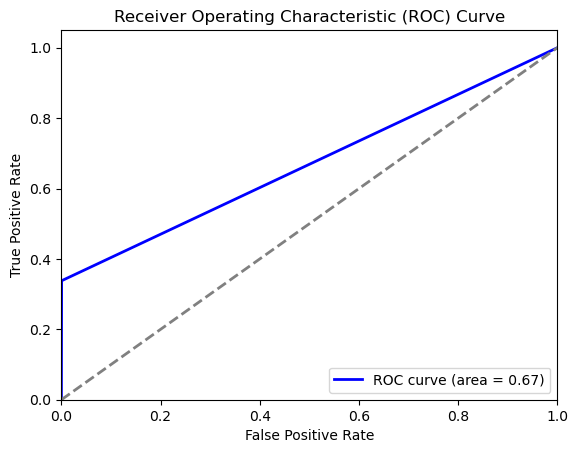

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'fraudTest.csv'
df = pd.read_csv(file_path)

# Data preprocessing
# Dropping certain columns and any other non-numeric columns
df = df.drop(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num', 'unix_time', 'merch_long'], axis=1)

# Encode categorical variables (gender)
df = pd.get_dummies(df, columns=['gender'])

# Split the data into features and target
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNeighbors classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate performance measures
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate additional measures
tn, fp, fn, tp = conf_matrix.ravel()
false_positive_rate = fp / (fp + tn)
true_negative_rate = tn / (tn + fp)
false_negative_rate = fn / (fn + tp)
cost = 100 * fn + 10 * (fp + tp)
f_measure = 2 * (precision * recall) / (precision + recall)
balanced_classification_rate = 1 * (tp / (tp + fn) + tn / (tn + fp))
mathews_corr_coef = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
geometric_mean = (true_negative_rate * recall) ** 0.5

# Define weight for weighted accuracy calculation
w = 0.5

# Calculate weighted accuracy
weighted_accuracy = w * recall + (1 - w) * true_negative_rate

# Print the performance measures
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Positive Rate: {false_positive_rate:.4f}")
print(f"True Negative Rate: {true_negative_rate:.4f}")
print(f"False Negative Rate: {false_negative_rate:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Cost: {cost:.4f}")
print(f"F-measure: {f_measure:.4f}")
print(f"Balanced Classification Rate: {balanced_classification_rate:.4f}")
print(f"Mathews Correlation Coefficient: {mathews_corr_coef:.4f}")
print(f"Geometric Mean: {geometric_mean:.4f}")
print(f"Weighted Accuracy: {weighted_accuracy:.4f}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.9962
Precision: 0.0000
Recall: 0.0000
False Positive Rate: 0.0000
True Negative Rate: 1.0000
False Negative Rate: 1.0000
ROC AUC Score: 0.5000
Cost: 42600.0000
F-measure: 0.0000
Balanced Classification Rate: 0.5000
Mathews Correlation Coefficient: 0.0000
Geometric Mean: 0.0000
Weighted Accuracy: 0.5000


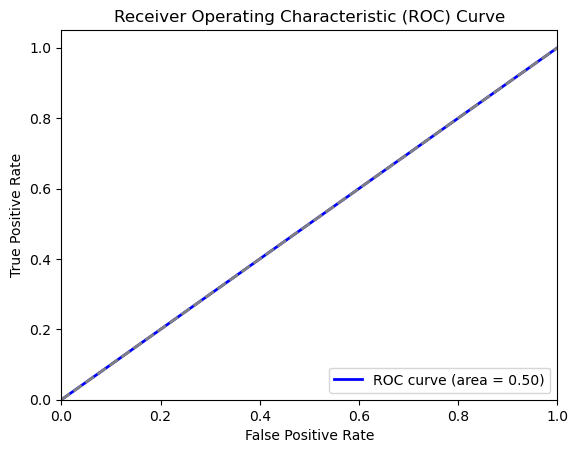

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'fraudTest.csv'
df = pd.read_csv(file_path)

# Data preprocessing
# Dropping certain columns and any other non-numeric columns
df = df.drop(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num', 'unix_time', 'merch_long'], axis=1)

# Encode categorical variables (gender)
df = pd.get_dummies(df, columns=['gender'])

# Split the data into features and target
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the AdaBoost classifier with SAMME algorithm
ada_boost = AdaBoostClassifier(algorithm='SAMME')
ada_boost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_boost.predict(X_test)

# Calculate performance measures
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate additional measures
tn, fp, fn, tp = conf_matrix.ravel()
false_positive_rate = fp / (fp + tn) if (fp + tn) != 0 else 0
true_negative_rate = tn / (tn + fp) if (tn + fp) != 0 else 0
false_negative_rate = fn / (fn + tp) if (fn + tp) != 0 else 0
cost = 100 * fn + 10 * (fp + tp)
f_measure = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
balanced_classification_rate = 0.5 * (tp / (tp + fn) + tn / (tn + fp)) if (tp + fn) != 0 and (tn + fp) != 0 else 0
mathews_corr_coef_denominator = ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
mathews_corr_coef = (tp * tn - fp * fn) / mathews_corr_coef_denominator if mathews_corr_coef_denominator != 0 else 0
geometric_mean = (true_negative_rate * recall) ** 0.5 if true_negative_rate != 0 and recall != 0 else 0

# Define weight for weighted accuracy calculation
w = 0.5

# Calculate weighted accuracy
weighted_accuracy = w * recall + (1 - w) * true_negative_rate

# Print the performance measures
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Positive Rate: {false_positive_rate:.4f}")
print(f"True Negative Rate: {true_negative_rate:.4f}")
print(f"False Negative Rate: {false_negative_rate:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Cost: {cost:.4f}")
print(f"F-measure: {f_measure:.4f}")
print(f"Balanced Classification Rate: {balanced_classification_rate:.4f}")
print(f"Mathews Correlation Coefficient: {mathews_corr_coef:.4f}")
print(f"Geometric Mean: {geometric_mean:.4f}")
print(f"Weighted Accuracy: {weighted_accuracy:.4f}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.9958
Precision: 0.0000
Recall: 0.0000
False Positive Rate: 0.0003
True Negative Rate: 0.9997
False Negative Rate: 1.0000
ROC AUC Score: 0.4998
Cost: 42960.0000
F-measure: 0.0000
Balanced Classification Rate: 0.9997
Mathews Correlation Coefficient: -0.0011
Geometric Mean: 0.0000
Weighted Accuracy: 0.4998


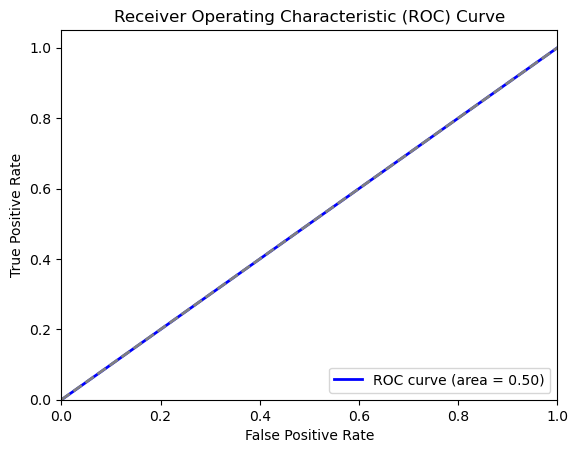

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'fraudTest.csv'
df = pd.read_csv(file_path)

# Data preprocessing
# Dropping certain columns and any other non-numeric columns
df = df.drop(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num', 'unix_time', 'merch_long'], axis=1)

# Encode categorical variables (gender)
df = pd.get_dummies(df, columns=['gender'])

# Split the data into features and target
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate performance measures
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate additional measures
tn, fp, fn, tp = conf_matrix.ravel()
false_positive_rate = fp / (fp + tn) if (fp + tn) != 0 else 0
true_negative_rate = tn / (tn + fp) if (tn + fp) != 0 else 0
false_negative_rate = fn / (fn + tp) if (fn + tp) != 0 else 0
cost = 100 * fn + 10 * (fp + tp)
f_measure = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
balanced_classification_rate = 1 * (tp / (tp + fn) + tn / (tn + fp)) if (tp + fn) != 0 and (tn + fp) != 0 else 0
mathews_corr_coef = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) if ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) != 0 else 0
geometric_mean = np.sqrt(true_negative_rate * recall) if (true_negative_rate * recall) != 0 else 0

# Define weight for weighted accuracy calculation
w = 0.5

# Calculate weighted accuracy
weighted_accuracy = w * recall + (1 - w) * true_negative_rate

# Print the performance measures
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Positive Rate: {false_positive_rate:.4f}")
print(f"True Negative Rate: {true_negative_rate:.4f}")
print(f"False Negative Rate: {false_negative_rate:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Cost: {cost:.4f}")
print(f"F-measure: {f_measure:.4f}")
print(f"Balanced Classification Rate: {balanced_classification_rate:.4f}")
print(f"Mathews Correlation Coefficient: {mathews_corr_coef:.4f}")
print(f"Geometric Mean: {geometric_mean:.4f}")
print(f"Weighted Accuracy: {weighted_accuracy:.4f}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.9962
Precision: 0.0000
Recall: 0.0000
False Positive Rate: 0.0000
True Negative Rate: 1.0000
False Negative Rate: 1.0000
ROC AUC Score: 0.5000
Cost: 42600.0000
F-measure: 0.0000
Balanced Classification Rate: 1.0000
Mathews Correlation Coefficient: 0.0000
Geometric Mean: 0.0000
Weighted Accuracy: 0.5000


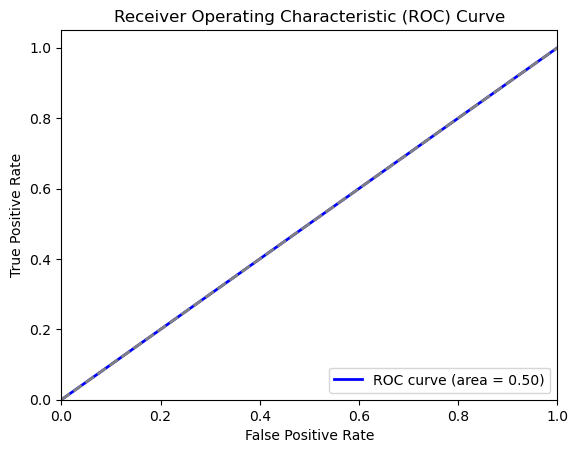

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'fraudTest.csv'
df = pd.read_csv(file_path)

# Data preprocessing
# Dropping certain columns and any other non-numeric columns
df = df.drop(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num', 'unix_time', 'merch_long'], axis=1)

# Encode categorical variables (gender)
df = pd.get_dummies(df, columns=['gender'])

# Split the data into features and target
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm = SVC(kernel='rbf', gamma='auto')
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate performance measures
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate additional measures
tn, fp, fn, tp = conf_matrix.ravel()
false_positive_rate = fp / (fp + tn) if (fp + tn) != 0 else 0
true_negative_rate = tn / (tn + fp) if (tn + fp) != 0 else 0
false_negative_rate = fn / (fn + tp) if (fn + tp) != 0 else 0
cost = 100 * fn + 10 * (fp + tp)
f_measure = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
balanced_classification_rate = 1 * (tp / (tp + fn) + tn / (tn + fp)) if (tp + fn) != 0 and (tn + fp) != 0 else 0
mathews_corr_coef = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) if ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) != 0 else 0
geometric_mean = np.sqrt(true_negative_rate * recall) if (true_negative_rate * recall) != 0 else 0

# Define weight for weighted accuracy calculation
w = 0.5

# Calculate weighted accuracy
weighted_accuracy = w * recall + (1 - w) * true_negative_rate

# Print the performance measures
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Positive Rate: {false_positive_rate:.4f}")
print(f"True Negative Rate: {true_negative_rate:.4f}")
print(f"False Negative Rate: {false_negative_rate:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Cost: {cost:.4f}")
print(f"F-measure: {f_measure:.4f}")
print(f"Balanced Classification Rate: {balanced_classification_rate:.4f}")
print(f"Mathews Correlation Coefficient: {mathews_corr_coef:.4f}")
print(f"Geometric Mean: {geometric_mean:.4f}")
print(f"Weighted Accuracy: {weighted_accuracy:.4f}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
